# Inelastic cross-sections of proton-proton and pion-proton collisions

According to a simple parton model, the cross-section for an inelastic proton-proton collision should be 3/2 of a pion-proton collision. In this picture, only the valence quarks matter. We know that at high energies most of the collisions involve sea quarks and gluons, so another theory says that the cross-sections might become equal at high energies.

I check this here by downloading cross-section data from the Particle Data Group, interpolating the data points and then plot the ratio. We get indeed a ratio of about 3/2=1.5. In reality, it is a bit larger, about 1.6. There is no visible trend that it does down to 1 with energy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.interpolate import interp1d

In [2]:
def read(url):
    r = requests.get(url)
    tab = r.text
    xy = []
    skip = 11
    for line in tab.strip().split("\n"):
        if skip:
            skip -= 1
            continue
        items = line.split()
        xi = float(items[3])
        yi = float(items[4])
        yei = (0.5 * sum(float(i) ** 2 for i in items[5:9])) ** 0.5
        xy.append((xi, yi, yei))
    xy.sort(key=lambda p: p[0])
    return np.transpose(xy)

In [3]:
pim_p = read("https://pdg.lbl.gov/2020/hadronic-xsections/rpp2020-pimp_total.dat")
pip_p = read("https://pdg.lbl.gov/2020/hadronic-xsections/rpp2020-pipp_total.dat")
p_p = read("https://pdg.lbl.gov/2020/hadronic-xsections/rpp2020-pp_total.dat")

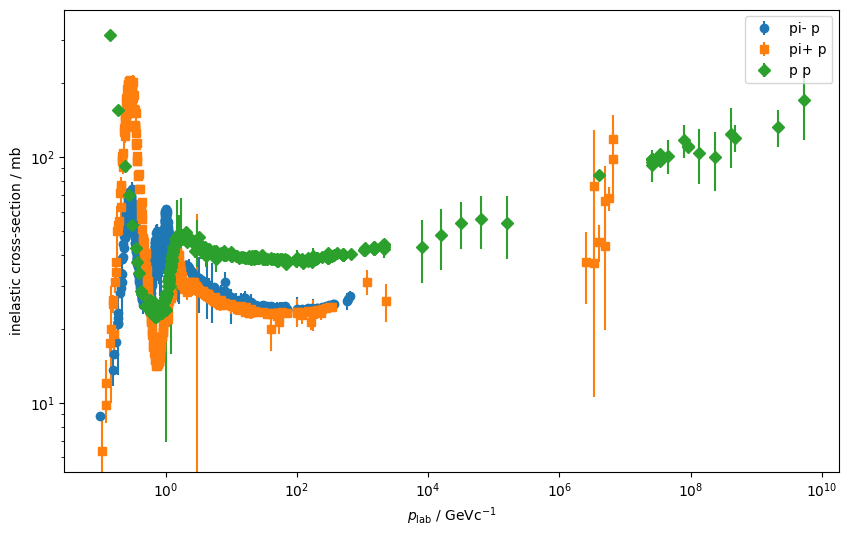

In [4]:
plt.figure(figsize=(10, 6))
plt.errorbar(*pim_p, fmt="o", label="pi- p")
plt.errorbar(*pip_p, fmt="s", label="pi+ p")
plt.errorbar(*p_p, fmt="D", label="p p")
plt.xlabel(r"$p_\mathrm{lab}$ / GeVc$^{-1}$")
plt.ylabel(r"inelastic cross-section / mb")
plt.loglog()
plt.legend();

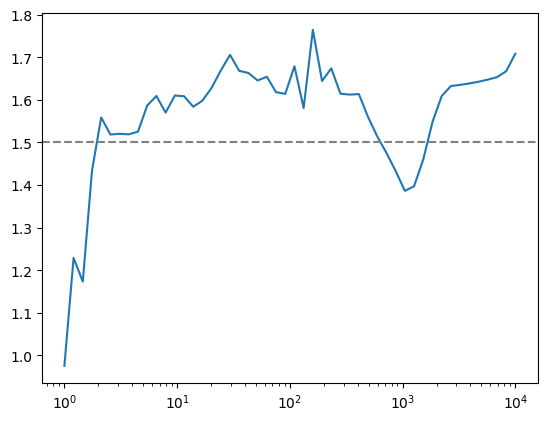

In [5]:
l_pip_p = interp1d(*pip_p[:2])
l_p_p = interp1d(*p_p[:2])
x = np.geomspace(1, 1e4)
plt.figure()
plt.plot(x, l_p_p(x) / l_pip_p(x))
plt.axhline(3/2, ls="--", color="0.5")
plt.semilogx();